In [1]:
## importing modules required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
## importing data into dataframe
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124.0,ad,False,130.0,Monday,20.0
1,1,1119715.0,ad,False,93.0,Tuesday,22.0
2,2,1144181.0,ad,False,21.0,Tuesday,18.0
3,3,1435133.0,ad,False,355.0,Tuesday,10.0
4,4,1015700.0,ad,False,276.0,Friday,14.0


In [15]:
## dropping null values
df.dropna(inplace=True)

In [3]:
df.duplicated(subset='user id').sum()

np.int64(0)

In [4]:
## droppig columns
df.drop(['Unnamed: 0','user id'],axis=1,inplace=True)

In [5]:
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130.0,Monday,20.0
1,ad,False,93.0,Tuesday,22.0
2,ad,False,21.0,Tuesday,18.0
3,ad,False,355.0,Tuesday,10.0
4,ad,False,276.0,Friday,14.0


In [6]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [13]:
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [14]:
## check if any catogorical variable have appropriate number of levels
for i in df_cat.columns :
  print(i.upper(),':',df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20. 22. 18. 10. 14. 13. 19. 11. 12. 16. 21.  3. 23.  4.  8.  0.  2. 15.
  1.  6. 17.  7.  9.  5.]


#### Univariate analysis

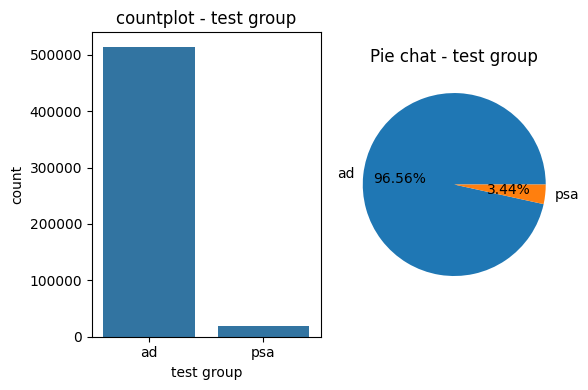

In [16]:
variable = "test group"

## count plot
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'countplot - {variable}')

## pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie chat - {variable}')

## adjust layout
plt.tight_layout()

## show plots
plt.show()

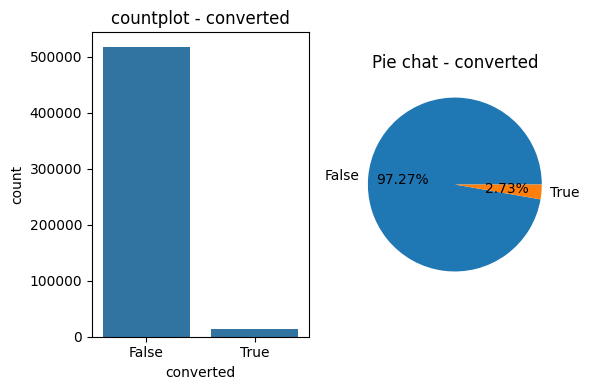

In [17]:
variable = "converted"

## count plot
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'countplot - {variable}')

## pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie chat - {variable}')

## adjust layout
plt.tight_layout()

## show plots
plt.show()

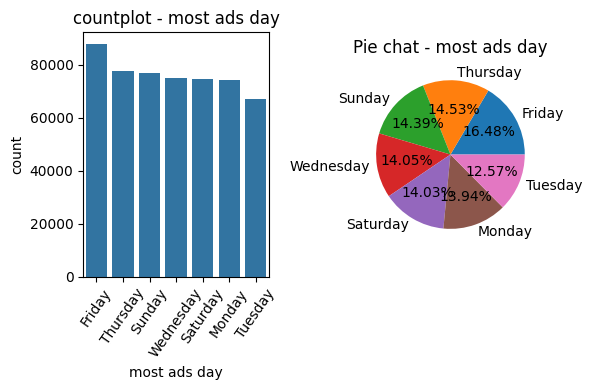

In [22]:
variable = "most ads day"

## count plot
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat['most ads day'].value_counts().index)
plt.title(f'countplot - {variable}')
plt.xticks(rotation=55)

## pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie chat - {variable}')

## adjust layout
plt.tight_layout()

## show plots
plt.show()

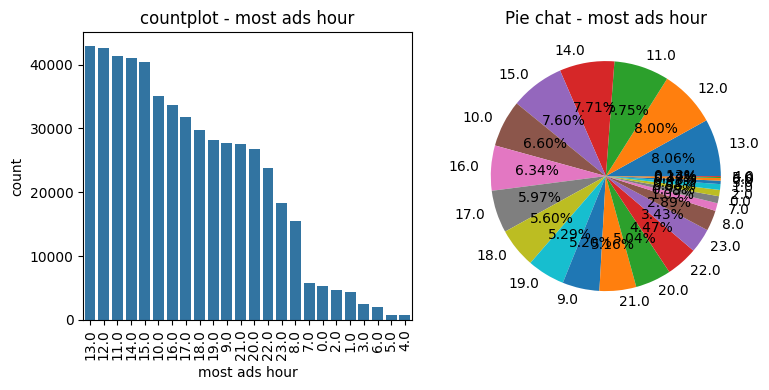

In [27]:
variable = "most ads hour"

## count plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat["most ads hour"].value_counts().index)
plt.title(f'countplot - {variable}')
plt.xticks(rotation=90)

## pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie chat - {variable}')

## adjust layout
plt.tight_layout()

## show plots
plt.show()

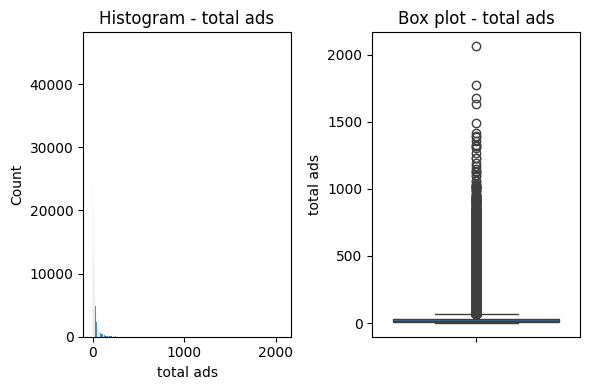

In [31]:
variable = "total ads"

## count plot
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df)
plt.title(f'Histogram - {variable}')

## pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df)
plt.title(f'Box plot - {variable}')

## adjust layout
plt.tight_layout()

## show plots
plt.show()

In [32]:
## checking the feature
df['total ads'].describe()

,total ads
count,532565.000000
mean,26.630884
std,45.479590
min,1.000000
25%,5.000000
50%,15.000000
75%,30.000000
max,2065.000000


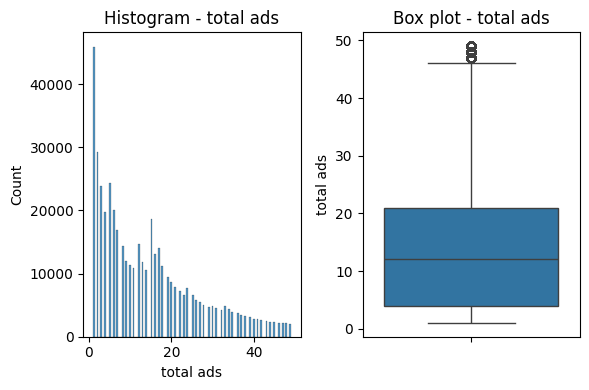

In [33]:
variable = "total ads"

## count plot
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
#filtering data close to 75th percentile for visualisation purposes
sns.histplot(x=variable,data=df[df['total ads']< 50])
plt.title(f'Histogram - {variable}')

## pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df[df['total ads']< 50])
plt.title(f'Box plot - {variable}')

## adjust layout
plt.tight_layout()

## show plots
plt.show()

### Bivariate analysis

In [34]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [35]:
ct_conversion_group = pd.crosstab(df['test group'],df['converted'],normalize='index')
ct_conversion_group

converted,False,True
test group,,
ad,0.972471,0.027529
psa,0.978689,0.021311


<Axes: xlabel='test group'>

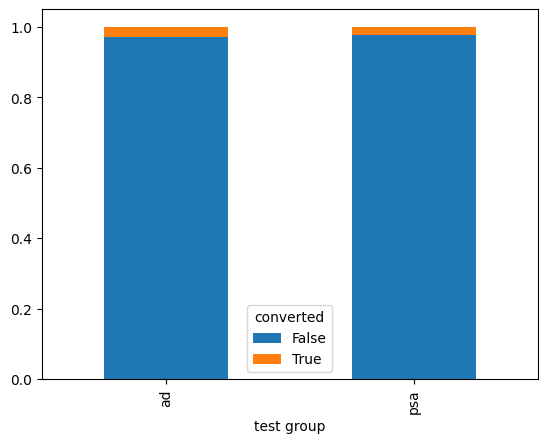

In [36]:
ct_conversion_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.962372  0.037628
Tuesday       0.966713  0.033287
Sunday        0.973256  0.026744
Wednesday     0.973473  0.026527
Friday        0.976861  0.023139
Thursday      0.977225  0.022775
Saturday      0.977298  0.022702


<Axes: xlabel='most ads day'>

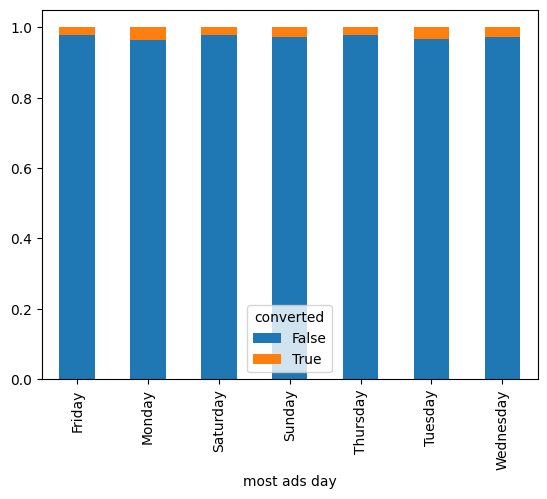

In [37]:
ct_conversion_group = pd.crosstab(df['most ads day'],df['converted'],normalize='index')
print(ct_conversion_group.sort_values(by= True,ascending=False))
ct_conversion_group.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16.0           0.966782  0.033218
15.0           0.968032  0.031968
20.0           0.968341  0.031659
21.0           0.969043  0.030957
14.0           0.969374  0.030626
17.0           0.969701  0.030299
18.0           0.970790  0.029210
22.0           0.971459  0.028541
19.0           0.971822  0.028178
13.0           0.973155  0.026845
12.0           0.974077  0.025923
23.0           0.975392  0.024608
11.0           0.975674  0.024326
10.0           0.976574  0.023426
6.0            0.976638  0.023362
5.0            0.978022  0.021978
8.0            0.978202  0.021798
9.0            0.978950  0.021050
7.0            0.980274  0.019726
0.0            0.981182  0.018818
4.0            0.983942  0.016058
1.0            0.985899  0.014101
3.0            0.989445  0.010555
2.0            0.991695  0.008305


<Axes: xlabel='most ads hour'>

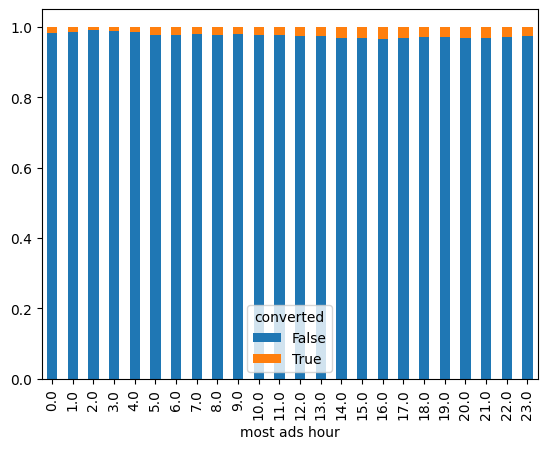

In [42]:
ct_conversion_group = pd.crosstab(df['most ads hour'],df['converted'],normalize='index')
print(ct_conversion_group.sort_values(by= True,ascending=False))
ct_conversion_group.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

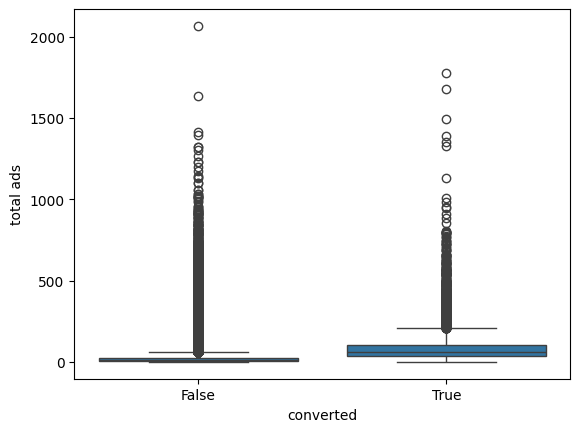

In [44]:
sns.boxplot(x='converted',y='total ads',data=df)

<Axes: xlabel='converted', ylabel='total ads'>

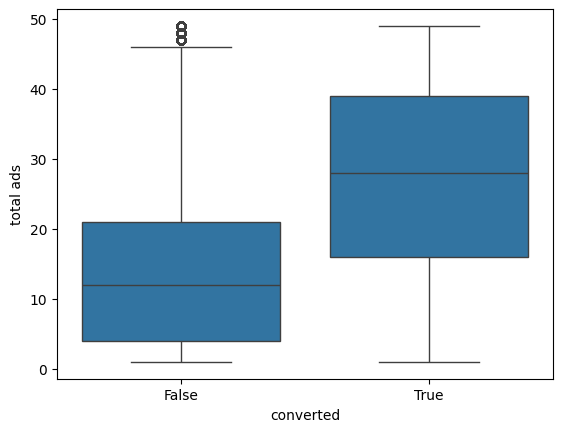

In [43]:
sns.boxplot(x='converted',y='total ads',data=df[df['total ads'] < 50])

## Statistical Tests

In [46]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
    # create contingency table
    contingency_table = pd.crosstab(df_cat[variable],df_cat['converted'])

    #perform chi squared test
    chi2, p, _, _ =chi2_contingency(contingency_table)

    #display the results
    print(f'\nchi squared test for {variable} vs converted')
    print(f'Chi-squared value: {chi2}')
    print(f'p value: {p}')

    # check for significance
    if p < alpha:
      print(f"the difference in conversion rate across {variable} is statistically significant")
    else:
      print(f"there is no signoficant difference in conversion rate across {variable}")



chi squared test for test group vs converted
Chi-squared value: 25.474796253664074
p value: 4.4819989464403127e-07
the difference in conversion rate across test group is statistically significant

chi squared test for most ads day vs converted
Chi-squared value: 567.1917703726831
p value: 2.7752657278986725e-119
the difference in conversion rate across most ads day is statistically significant

chi squared test for most ads hour vs converted
Chi-squared value: 396.23101684052995
p value: 1.0596626294585869e-69
the difference in conversion rate across most ads hour is statistically significant


In [47]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [62]:
from scipy.stats import shapiro,levene,ttest_ind,mannwhitneyu

# step 1 : check assumption
# normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted']== False]['total ads'])

print(f'Shapiro-wilk test for normality (true group): p-value = {shapiro_p_value_true}')
print(f'Shapiro-wilk test for normality (false group): p-value = {shapiro_p_value_false}')

#equality of variances assumptions
# Use .loc to correctly access data based on the boolean condition
# Convert the 'converted' column to boolean type if it's not already
df['converted'] = df['converted'].astype(bool)
levene_stat, levene_p_value = levene(df.loc[df['converted'],'total ads'], df.loc[~df['converted'], 'total ads'])
print(f'Levene test for equality of variance: p-value : {levene_p_value}')

Shapiro-wilk test for normality (true group): p-value = 5.705873580865989e-98
Shapiro-wilk test for normality (false group): p-value = 5.264610084011983e-201
Levene test for equality of variance: p-value : 0.0


In [60]:
## step 2 : perform a suitable test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
   #assumption met - use t-test means
   t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
   print(f'independent two-sample t-test: p-value = {t_p_value}')
else:
  #assumptions not met use man whitney u test
  u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f'mann whitney u test: p-value = {u_p_value}')

mann whitney u test: p-value = 0.0
